In [66]:
#separating video into frames 
import cv2

# Open the .mov file
video = cv2.VideoCapture('3_sabreshort.MOV')

# Check if the video is successfully opened
if not video.isOpened():
    print("Error opening video file")

# Initialize variables
frame_count = 0

# Read and save frames until the end of the video
while video.isOpened():
    # Read the current frame
    ret, frame = video.read()

    # Check if frame is successfully read
    if not ret:
        break

    # Save the frame as an image file
    frame_filename = f"sframe_{frame_count}.jpg"
    cv2.imwrite(frame_filename, frame)

    # Increment frame count
    frame_count += 1

    # Display the current frame (optional)
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video object and close any open windows
video.release()
cv2.destroyAllWindows()

In [13]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline
import math

started
out of loop


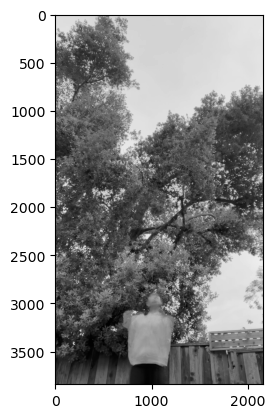

finished


In [8]:
#separating background and foreground
print('started') 
im = cv2.imread('bestimage.jpg')
list_of_frames = []
for frame_number in range (0,44):
    im_temp = cv2.imread('sframe_'+str(frame_number)+'.jpg')
    im_rgb = cv2.cvtColor(im_temp, cv2.COLOR_BGR2GRAY)
    list_of_frames += [im_rgb]
print('out of loop')
images = np.stack(list_of_frames, axis=0)
median_image = np.median(images, axis=0).astype(np.uint8) #long one
plt.imshow(median_image, cmap = "gray")
plt.show() 
print('finished')

In [17]:
#functions to draw lines 
def draw_lines(img, houghLines, color=[0, 255, 0], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            
 
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)   

 
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

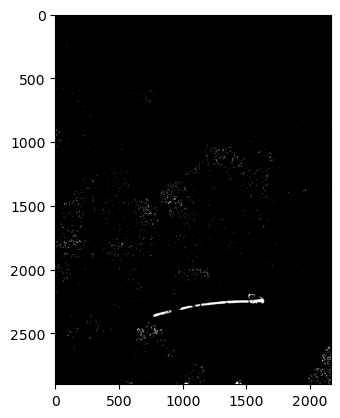

threshold is 570


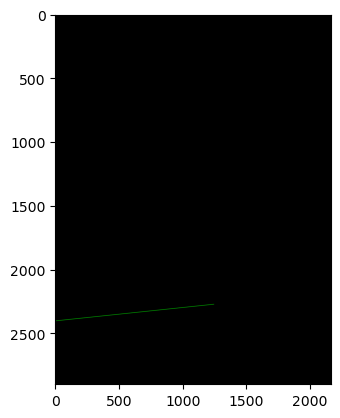

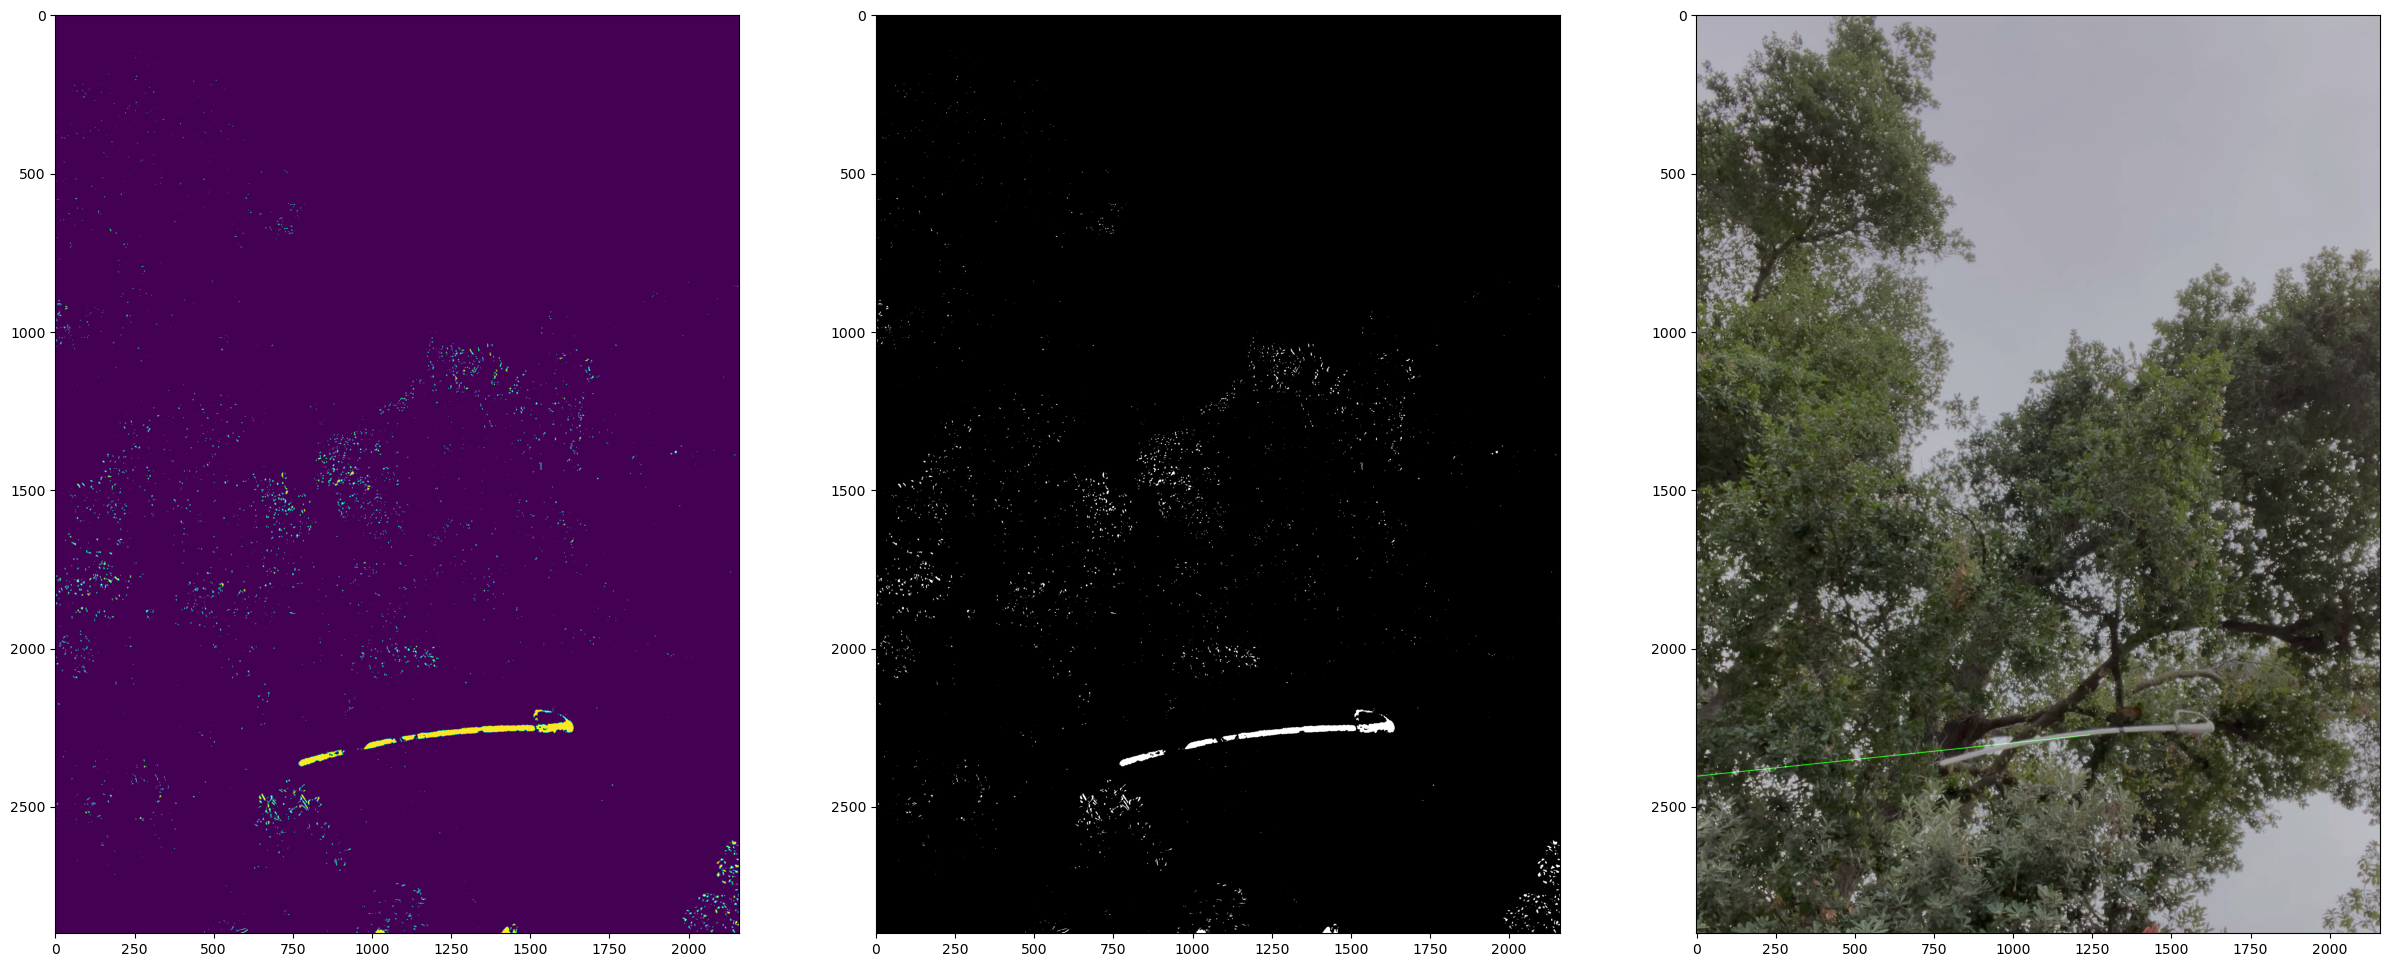

In [165]:
#finding outline 
im_temp = cv2.imread('sframe_'+str(20)+'.jpg')[:2900,:]
im_gray = cv2.cvtColor(im_temp, cv2.COLOR_BGR2GRAY)
value_collector = np.zeros(im_gray.shape)
for i in range(im_gray.shape[0]):
    for j in range(im_gray.shape[1]):
        if np.abs(float(median_image[i][j]) - float(im_gray[i][j])) < 50: 
            value_collector[i][j] = 0 
        else:
            value_collector[i][j] = 255 
plt.imshow(value_collector, cmap = "gray")
plt.show() 

#drawing the hough lines 
u8_image = value_collector.astype(np.uint8)
im_rgb = cv2.cvtColor(im_temp, cv2.COLOR_BGR2RGB)
rho_resolution = 1
theta_resolution = np.pi/180
for threshold in range(800, 400, -10):
    hough_lines = cv2.HoughLines(u8_image, rho_resolution , theta_resolution , threshold)
    if isinstance(hough_lines, np.ndarray):
        print("threshold is %d"%threshold)
        break
    
hough_lines_image = np.zeros_like(im_temp)
draw_lines(hough_lines_image, hough_lines)
plt.imshow(hough_lines_image)
plt.show()
original_image_with_hough_lines = weighted_img(hough_lines_image,im_rgb)
 
plt.figure(figsize = (30,20))
plt.subplot(131)
plt.imshow(value_collector)
plt.subplot(132)
plt.imshow(value_collector, cmap='gray')
plt.subplot(133)
plt.imshow(original_image_with_hough_lines, cmap='gray') 
plt.show()



In [162]:
for line in hough_lines:
    #for p1,p2 in line:
    print(line[0]) 

[3.251000e+03 1.727876e+00]
[3.254000e+03 1.727876e+00]


threshold is 330


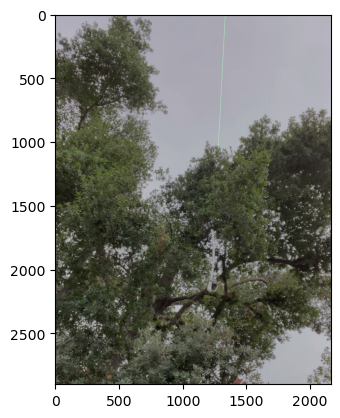

threshold is 460


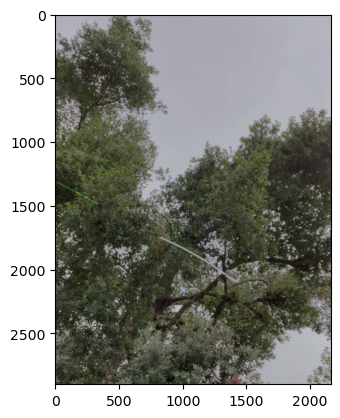

threshold is 540


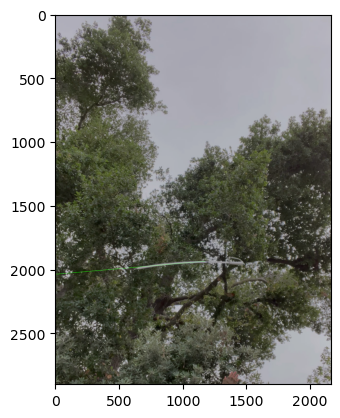

threshold is 620


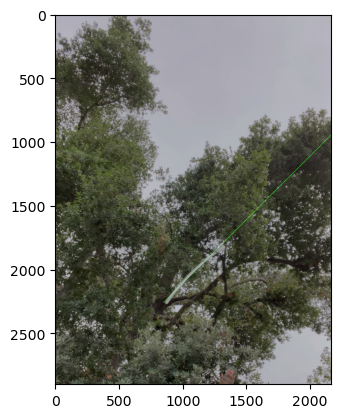

threshold is 585


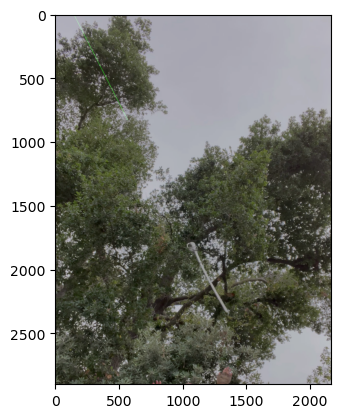

[0.05235988, 2.0594885, 1.4835298, 0.7853982, 2.6703537]


In [178]:
#all code with loop, only shows final image and returns list of angles
angles =[]
for i in range (25,30): 
    im_temp = cv2.imread('sframe_'+str(i)+'.jpg')[:2900,:]
    im_gray = cv2.cvtColor(im_temp, cv2.COLOR_BGR2GRAY)
    value_collector = np.zeros(im_gray.shape)
    for i in range(im_gray.shape[0]):
        for j in range(im_gray.shape[1]):
            if np.abs(float(median_image[i][j]) - float(im_gray[i][j])) < 50: 
                value_collector[i][j] = 0 
            else:
                value_collector[i][j] = 255 
    #plt.imshow(value_collector, cmap = "gray")
    #plt.show() 
    u8_image = value_collector.astype(np.uint8)
    im_rgb = cv2.cvtColor(im_temp, cv2.COLOR_BGR2RGB)
    rho_resolution = 1
    theta_resolution = np.pi/180

    for threshold in range(800, 200, -5):
        hough_lines = cv2.HoughLines(u8_image, rho_resolution , theta_resolution , threshold)
        if isinstance(hough_lines, np.ndarray):
            print("threshold is %d"%threshold)
            break


    hough_lines_image = np.zeros_like(im_temp)
    if hough_lines is not None:
        draw_lines(hough_lines_image, hough_lines)
        for line in hough_lines:
            for rho,theta in line:
                angles.append(theta)
    original_image_with_hough_lines = weighted_img(hough_lines_image,im_rgb)
    plt.imshow(original_image_with_hough_lines, cmap='gray') 
    plt.show()
    #print(theta_resolution)
print(angles)
